### 6.3 最优化方法计算投资组合的最佳仓位

在前面的学习中，我们分别从截面（多因子模型）和时序（择时策略）两个方面学习了如何对各个股票的未来收益率进行预测；在多因子模型中，我们在同一个时间截面上，计算出每个股票在不同因子上的暴露，通过线性/非线性的方法将多个因子合成综合因子作为股票未来收益率强弱的预测值；在择时策略中，我们计算每个股票的时序信号，更进一步地，我们可以将离散的时序信号值连续化，使得不同股票的择时信号不再是0或1，连续信号的差异化使得在截面上不同股票的择时信号能够进行强弱比较。

细心的读者可能已经发现了，上文多因子模型和时序策略，提到的最终目标，都是在每一个时间截面上，输出股票对未来收益率的预测值，并且在截面上不同股票之间进行强弱比较。这是因为在实盘中，往往有多种限制约束着我们的投资行为。一个最现实的考量就是资金，以A股为例，买卖股票最小的单位为1手，即100股；如果时序模型同时有100支股票产生买入信号1，又或者多因子模型预测值前100支股票具有同样的值；但此时我们可支配的资金只足够交易50支股票，那么如何从100支股票中定量地挑选50支股票呢？所以尽可能地，我们希望在同一时间截面上，不同股票的预测值之间是有差异的。

无论是作为主观投资者重仓少数证券，还是基于量化模型的策略，都会面临如上的问题，每一个证券买多少。假设我们的限制条件很少，例如只有前文提到的资金限制，而截面上不同股票的预测值差异足够大，我们能够恰如其分地选出目标数量的证券；而如果截面上的预测值差异不够大，例如我们需要在100支相同预测值相近的股票中挑选实际交易的50支股票，量化模型还可以借助组合优化的方法。

由此，便引出了本节内容的主题，投资组合优化，即如何分配资金。下文中我们将详细介绍各类优化方法，在此之前，首先我们先对常用的数学符号进行约定，如下表所示。

$$
\begin{array}{cc}N & \text { 组合内证券数量 } \\ \omega & \text { 权重向量 }(\mathbb{N} \times 1) \\ \omega_{\mathrm{i}} & \text { 证券 } \mathrm{i} \text { 的权重 } \\ \mu & \text { 预期收益率向量 }(\mathbb{N} \times 1) \\ \sigma & \text { 证券波动率向量 }(\mathbb{N} \times 1) \\ \sigma_{\mathrm{i}} & \text { 证券 } \mathrm{i} \text { 的波动率 } \\ \sigma_{i j} & \text { 证券 } \mathrm{i} \text { 和证券 } \mathrm{i} \text { 之间的协方差 } \\ \Sigma & \text { 方差协方差矩阵 }(\mathbb{N} \times \mathbb{N}) \\ \sigma_{\mathrm{p}} & \text { 组合波动率 } \\ \mu_{\mathrm{p}} & \text { 组合收益率 } \\ \lambda & \text { 风险厌恶系数 } \\ \mathrm{r}_{f} & \text { 无风险收益率 }\end{array}
$$

#### 6.3.1 等权重

那么在没有任何信息或者偏好时，等权重是最简单的办法，即赋予组合中每个证券相同的权重，意味着我们视每个证券具有同等的重要性。

$$
\omega_{i}=\frac{1}{N}
$$

值得一提的是，虽然等权重看起来非常简单，不需要复杂的数学求解，但是等权重组合的业绩表现往往是非常抢眼的，因此在研究中常被用来作为比较基准。

#### 6.3.2 市值加权

对于股票组合而言，在没有任何信息或者偏好时，还有另外一种使用非常普遍的组合方法，即市值加权。通常地，小市值的股票收益率的日波动是大于大市值股票的，因为小市值股票和大市值股票能承载的资金量是不同的，令小市值股票涨/跌1%需要的资金可能远小于大市值的股票。而如果我们希望在组合内各个股票平等的分配资金，由于大小市值这种属性，等权重组合可能需要非常频繁调仓。而市值加权，根据定义，对于选出的股票，按照其市值加权，即

$$
\omega_{i}=C a p_{i} / \sum_{i} C a p_{i} \\
C a p_{i} 为股票 i 的市值
$$

市值加权不需要频繁调仓，往往流动性也最强；不过，市值加权会给与高估值股票过多权重，给与低估值股票过少权重，因此结果在一些结构性行情下可能并不占优。

#### 6.3.3 最小方差组合（Minimum Variance）

前文两种组合方法，都是在没有任何信息或者偏好时可以使用的。然而，在实际投资过程中，每个投资者都暴露在海量的信息中，同时每个投资者的风险偏好也是不同的。对于风险厌恶的投资者，自然是希望投资者的风险是最小的。由于总体的风险是未知的，在组合优化中，我们常常用历史收益率的方差最为代理变量，追求组合整体的方差最小，数学表达为，

$$
\operatorname{Min} \ \sigma_{\mathrm{p}}=\omega^{\prime} \Sigma \omega \\
\Rightarrow \ \omega \propto \Sigma ^{-1} \mathbf{1}
$$

#### 6.3.4 最大分散度（Maximum Diversification）

从组合的方差-协方差矩阵我们可知，组合的整体风险一部分来源于各个证券自身的方差，另一部分来源于证券之间的协方差。因此，如果我们想降低组合风险，就应该尽量分散投资。在2008年，Choueifaty和Coignard于是提出了最大分散度优化，该方法的数学表达为，

$$
\operatorname{Max} \quad D(w)=\frac{\omega^{\prime} \sigma}{\sqrt{\omega^{\prime} \Sigma \omega}} \\
\Rightarrow \ \omega \propto \Sigma^{-1} \sigma
$$

目标函数被称为分散比率，分母为组合波动率，分子为成分的波动率加权平均。该方法最大化资产线性加权波动率与投资组合波动率的比值，故称为最大分散化资产配置组合。

#### 6.3.5 风险平价（Risk Parity)

风险平价从风险的角度进行均衡配置，以追求所有证券对组合的风险贡献相同。首先定义所谓的边际风险贡献，即每增加1单位证券$i$的权重$ \omega_{i} $所引起的组合整体风险的变化，

$$
\begin{aligned} M R C_{i}=\frac{\partial \sigma_{p}}{\partial \omega_{i}} & =\frac{\omega_{i} \sigma_{i}^{2}+\sum_{j \neq i} \omega_{j} \rho_{i j} \sigma_{i} \sigma_{j}}{\sigma_{p}} \\ & =\frac{\sum_{j=1}^{N} \omega_{j} \rho_{i j} \sigma_{i} \sigma_{j}}{\sigma_{p}} \\ & =\frac{\rho_{i p} \sigma_{i} \sigma_{p}}{\sigma_{p}} \\ & =\left(\frac{\rho_{i p} \sigma_{i}}{\sigma_{p}}\right) \sigma_{p} \\ & =\beta_{i} \sigma_{p}\end{aligned}
$$

其中$\beta_{i}$表示证券$i$收益率相对于投资组合收益率的$\beta$系数；

定义了证券的边际风险贡献后，乘以其权重我们既可以得到风险贡献，

$$
\mathrm{RC}_{\mathrm{i}}=\omega_{\mathrm{i}} \times M R C_{i}=\omega_{\mathrm{i}} \frac{\partial \sigma_{\mathrm{p}}}{\partial \omega_{i}}
$$

由 Risk Parity 的定义有，

$$
\mathrm{RC}_{\mathrm{i}}=\mathrm{RC}_{\mathrm{j}} \\
\Rightarrow  \omega_{i} \frac{\partial \sigma_{p}}{\partial \omega_{i}}=\omega_{j} \frac{\partial \sigma_{p}}{\partial \omega_{j}}, \quad \forall i, j \\
$$

因此，风险平价组合的目标函数为，

$$
\operatorname{Min} \sum_{i=1}^{N} \sum_{j=1}^{N}\left(R C_{i}-R C_{j}\right)^{2} \\
\Rightarrow \quad \omega_{i} \propto \frac{1}{\beta_{i}}
$$

在 Risk Parity投资组合中，证券的权重和它相对于组合的 β 成反比；β 越高，其权重越低，从而有效的分散了风险，每个资产对组合的边际风险贡献相同。

#### 6.3.6 均值方差优化

以上的介绍的最小方差、最大分散度、风险平价的优化方法，都还是集中在风险上。而我们常说，一个优秀的投资策略，往往是在给定风险水平下实现组合收益最大化，或者在给定收益水平实现组合风险最小化。稍微有一些金融相关背景的读者可能已经提前猜到了，最终我们绕不开的优化方法，也是组合优化问题中的老大哥，即Markowitz的均值方差优化。

其目标函数为，

$$
\operatorname{Max} \quad \omega^{\mathrm{T}} \mu-\frac{\lambda}{2} \omega^{\prime} \Sigma \omega
$$

理论上来讲，组合成分间存在无数个混搭方式，每种方式得到一个收益风险对，将所有结果集合在一起，就形成了可行域，如图所示。可行域中并不是所有点都是“好结果”，只有处于可行域上侧边缘的点才是最优值，即MVO的解，如图中A到D之间连线，这条线称为有效前沿。任何异于有效前沿的点，均能找到相同风险（收益）下收益（风险）更高（低）的组合。

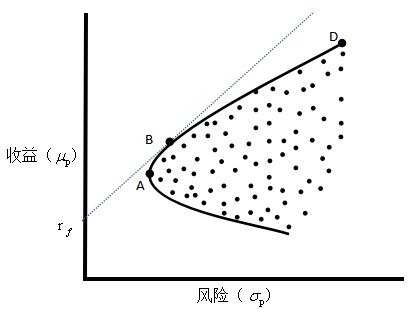

图片来源：CQR

其中，图上的A点即前文讨论过的最小方差组合，位于有效前沿的最左端；而如果我们自无风险收益率起做一条射线，与有效前沿相切于B点，改点即为所有可行域中夏普比率最大的点，因此也被称为最大夏普组合。故也有另外一种常见的，最大化组合夏普比率，其目标函数为。

$$
\operatorname{Max} \frac{\omega^{\prime} \mu}{\sqrt{\omega^{\prime} \sum \omega}}
$$

相比于前文介绍的各个优化方法，均值方差优化引入了更多的参数。在实践中，也面临着更多的问题。由于引入了更多的参数，尤其是对预期收益率的估计，会使得优化结果对参数的输入非常敏感，结果就是优化出的权重在时序上换手较快；容易输出极端大或极端小的权重，最终组合时常在个别证券上集中度过高；基于历史数据的均值方差组合，由于估计误差，在样本外甚至很难超越等权重组合。当然列举诸多问题，并非是说均值方差模型徒有虚名。恰恰相反，均值方差模型在组合优化领域是最常用也最经典的，正是因此，我们应该更深入的去了解经典模型背后的优劣，使其在投资实践中发挥最大的价值。事实上，针对这些问题后续的改进工作也一直没有停过，比较出名的例如Black-Litterman模型，又或是Bayes-Stein模型，由于篇幅所限，暂时就不在此提及，有兴趣的同学可以自行去深入了解一下。

#### 6.3.7 常见约束

在实际投资中，往往除了最现实的资金限制外，还会有各种各样的限制。比较常见的限制有，

**约束1：单资产权重的范围限制**：

$$
\omega_{lb} \leq \omega \leq \omega_{ub}
$$

**约束2：做空限制**

在A股市场融券的成本较高，因此一般是默认存在做空限制

$$
\begin{array}{l}\omega^{T} \mathbf{1}=1 \\ \omega \geq \mathbf{0}\end{array}
$$

另外，常见的量化策略例如指数增强和中性对冲，往往都有明确对标的基准指数，由此衍生出相对基准指数内的成分股的一些限制，

**约束3：行业中性化**

$$
\left(\omega-\omega_{\text {benchmark }}\right)^{T} I_{\text {industry } \in D}=\mathbf{0}
$$

其中，$\omega_{benchmark}$是基准指数内各成分股的权重向量，$I_{indusrty}$是代表行业的哑变量矩阵。

**约束4：风险敞口限制**

$$
\left|\left(\omega-\omega_{\text {benchmark }}\right)^{T}\right| f \leq f_{ub} \in[0,1]
$$

其中，$\omega_{benchmark}$是基准指数内各成分股的权重向量，$f$是风险因子暴露向量，$f_{ub}$是因子的风险敞口上限。

### 6.4 Python实现最佳仓位控制

在Python中我们可以使用scipy库构建组合优化模型，实现最佳仓位控制。

首先，我们导入如下Python库

In [6]:
import akshare as ak
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.optimize import minimize

定义一些辅助函数

In [7]:
def get_weights(df: pd.DataFrame, target='sharp', canshort=False) -> pd.Series:
    '''
    :param df: 资产日度涨跌幅矩阵
    :param target: 优化目标 sharp→最大夏普比组合 rp→风险平价组合  var→最小风险组合
    :param canshort: 是否可以做空
    :return: 组合比率
    '''
    MeanReturn = df.mean().values  # 期望收益
    Cov = df.cov()  # 协方差

    # 定义优化函数、初始值、约束条件
    # 负夏普比
    def neg_sharp(w):
        R = w @ MeanReturn
        Var = w @ Cov @ w.T
        sharp = R / Var ** 0.5
        return -sharp * np.sqrt(240)

    # 风险
    def variance(w):
        Var = w @ Cov @ w.T
        return Var * 10000

    def RiskParity(w):
        weights = np.array(w)  # weights为一维数组
        sigma = np.sqrt(np.dot(weights, np.dot(Cov, weights)))  # 获取组合标准差
        # sigma = np.sqrt(weights@cov@weights)
        MRC = np.dot(Cov, weights) / sigma  # MRC = Cov@weights/sigma
        # MRC = np.dot(weights,cov)/sigma
        TRC = weights * MRC
        delta_TRC = [sum((i - TRC) ** 2) for i in TRC]
        return sum(delta_TRC)

    # 设置初始值
    w0 = np.ones(df.shape[1]) / df.shape[1]
    # 约束条件 w之和为1
    cons = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bnds = tuple((0, 1) for w in w0)  # 做多的约束条件，如果可以做空，则不传入该条件

    if target == 'sharp':
        fc = neg_sharp
    elif target == 'rp':
        fc = RiskParity
    elif target == 'var':
        fc = variance

    if canshort:
        res = minimize(fc, w0, method='SLSQP', constraints=cons, options={'maxiter': 100})
    else:
        res = minimize(fc, w0, method='SLSQP', constraints=cons, options={'maxiter': 100}, bounds=bnds)

    # if target == 'sharp':
    #     print('最高夏普:', -res.fun)
    # elif target == 'rp':
    #     print('风险平价:', res.fun)
    # elif target == 'var':
    #     print('最低风险:', res.fun)

    # print('最优比率:', res.x)
    # print('年化收益:', ReturnYearly(res.x) * 100, "%")
    weight = pd.Series(res.x, index=df.columns)
    return weight

借助akshare我们下载股票的复权收盘价，计算日收益率

In [8]:
def get_ret(code,start_date,end_date):
    data = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=start_date, end_date=end_date, adjust="hfq")
    data.index = pd.to_datetime(data['日期'], format='%Y-%m-%d')  # 设置日期索引
    close = data['收盘']  # 日收盘价
    close.name = code
    ret = close.pct_change() # 日收益率
    return ret

In [9]:
ret_list = []
for code in stock_codes:
    ret = get_ret(code,start_date=start_date,end_date=end_date)
    ret_list.append(ret)
df_ret = pd.concat(ret_list,axis=1).dropna()

数据和模型都准备好后，我们就可以在时间轴上滚动计算最优化模型的权重，注意不要使用未来数据。

In [10]:
records = []
for trade_date in df_ret.loc[index_stock_cons_weight_csindex_df['日期'].iat[0]:].index.to_list():
    df_train = df_ret.loc[:trade_date].iloc[-1-240:-1]
    df_test = df_ret.loc[trade_date]
    StockSharpDf = get_weights(df_train, target='sharp')  # 最大夏普组合
    StockRPDf = get_weights(df_train, target='rp')  # 风险平价组合
    StockVarDf = get_weights(df_train, target='var')  # 最小风险组合
    records.append([trade_date,
                    (df_test.mul(StockSharpDf)).sum(),
                    (df_test.mul(StockRPDf)).sum(),
                    (df_test.mul(StockVarDf)).sum(),
                    df_test.mean()])
df_record = pd.DataFrame(records,columns=['日期','最大夏普组合','风险平价组合','最小风险组合','等权重组合'])
df_record = df_record.set_index('日期')

### 参考资料

[如何分配资金？组合优化的是是非非](https://mp.weixin.qq.com/s/Xm6tmd4WQEDnMw7Dft8TPw)

[浅析资产配置的几种方法](https://mp.weixin.qq.com/s/0WBpcEkWaNTIJ8H-u_9-OA)

[投资组合优化模型](https://mp.weixin.qq.com/s?__biz=MzAxNTc0Mjg0Mg==&mid=2653297069&idx=1&sn=0ce39862e32f523faf81a971caa357ad&scene=21#wechat_redirect)

[【实战】寻找最优投资组合：马科维兹 | 风险平价 | 最大夏普](https://www.wolai.com/stupidccl/vUp4zkiqPf2axRJvLAFfaa)